In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

27.956073009964527 93.98697642040406
-14.509970209250852 -168.96137376046687
-47.76954260564109 85.5537694609065
-15.026313311334619 -15.94368730057883
-4.43768810015257 -75.13229677064713
-32.041514974265084 168.91508096037626
75.51146720810934 -173.41748909733832
-13.809768353246525 106.54718771075596
80.26514336463433 -96.62249049450256
9.183770562160007 -12.084786751085716
35.793755141608415 -64.0593660486621
59.963156622050036 135.3136938295391
-32.459648272278514 125.80527415059828
-87.00960071976658 -75.95670245598198
17.260287750888395 -84.65414401702932
-37.5435498484711 -131.22093795845248
-79.89497910026299 40.716710696921496
45.0431368219067 12.876728869649014
5.308483973937868 -16.418117120770518
34.82840093381316 87.05103226652187
-87.06495923628731 -28.168171048212514
-67.31595064760536 -72.90931434171964
-5.085161509665383 -120.43760964260579
6.141363313299621 118.94462551252468
-7.443501523426704 -121.75720526607466
-28.144412713594406 -141.50456603521224
37.7518890881

In [5]:
from citipy import citipy
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
 
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ziro
Processing Record 2 of Set 1 | satitoa
City not found. Skipping...
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | lagunas
Processing Record 6 of Set 1 | ahipara
Processing Record 7 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 8 of Set 1 | kawalu
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | kamakwie
Processing Record 11 of Set 1 | saint george
Processing Record 12 of Set 1 | eldikan
City not found. Skipping...
Processing Record 13 of Set 1 | esperance
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | savannah bight
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | porto tolle
Processing Record 19 of Set 1 | goderich
Processing Record 20 of Set 1 | lasa
Processing Record 21 of Set 1 | atuona

Processing Record 36 of Set 4 | mahebourg
Processing Record 37 of Set 4 | kankon
Processing Record 38 of Set 4 | constitucion
Processing Record 39 of Set 4 | kargil
Processing Record 40 of Set 4 | balad
Processing Record 41 of Set 4 | saint-philippe
Processing Record 42 of Set 4 | college
Processing Record 43 of Set 4 | kaitangata
Processing Record 44 of Set 4 | paranaiba
Processing Record 45 of Set 4 | toulepleu
City not found. Skipping...
Processing Record 46 of Set 4 | trairi
Processing Record 47 of Set 4 | teluknaga
Processing Record 48 of Set 4 | kapoeta
Processing Record 49 of Set 4 | kismayo
Processing Record 50 of Set 4 | longyearbyen
Processing Record 1 of Set 5 | norman wells
Processing Record 2 of Set 5 | suzhou
Processing Record 3 of Set 5 | aitape
Processing Record 4 of Set 5 | auki
Processing Record 5 of Set 5 | pau brasil
Processing Record 6 of Set 5 | ayagoz
Processing Record 7 of Set 5 | sibolga
Processing Record 8 of Set 5 | port keats
Processing Record 9 of Set 5 | a

Processing Record 32 of Set 8 | dolbeau
City not found. Skipping...
Processing Record 33 of Set 8 | gopalur
Processing Record 34 of Set 8 | puerto del rosario
Processing Record 35 of Set 8 | vao
Processing Record 36 of Set 8 | baherden
Processing Record 37 of Set 8 | sydney
Processing Record 38 of Set 8 | olafsvik
Processing Record 39 of Set 8 | marsa matruh
Processing Record 40 of Set 8 | scottsbluff
Processing Record 41 of Set 8 | souillac
Processing Record 42 of Set 8 | chicama
Processing Record 43 of Set 8 | beloha
Processing Record 44 of Set 8 | isiro
Processing Record 45 of Set 8 | bombay
Processing Record 46 of Set 8 | pilar
Processing Record 47 of Set 8 | matara
Processing Record 48 of Set 8 | lichtenburg
Processing Record 49 of Set 8 | champerico
Processing Record 50 of Set 8 | labutta
City not found. Skipping...
Processing Record 1 of Set 9 | berlevag
Processing Record 2 of Set 9 | poum
Processing Record 3 of Set 9 | rocha
Processing Record 4 of Set 9 | simbahan
Processing Re

Processing Record 19 of Set 12 | moron
Processing Record 20 of Set 12 | la paz
Processing Record 21 of Set 12 | yuza
Processing Record 22 of Set 12 | casian
Processing Record 23 of Set 12 | tucuman
Processing Record 24 of Set 12 | boyolangu
Processing Record 25 of Set 12 | guararapes
Processing Record 26 of Set 12 | beisfjord
Processing Record 27 of Set 12 | ekhabi
Processing Record 28 of Set 12 | thayetmyo
Processing Record 29 of Set 12 | haimen
Processing Record 30 of Set 12 | boa vista
Processing Record 31 of Set 12 | talnakh
Processing Record 32 of Set 12 | senno
Processing Record 33 of Set 12 | vryburg
Processing Record 34 of Set 12 | digras
Processing Record 35 of Set 12 | codrington
Processing Record 36 of Set 12 | vaitupu
City not found. Skipping...
Processing Record 37 of Set 12 | pangnirtung
Processing Record 38 of Set 12 | toliary
City not found. Skipping...
Processing Record 39 of Set 12 | novoagansk
Processing Record 40 of Set 12 | garissa
Processing Record 41 of Set 12 | 

In [10]:
len(cities)

634

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ziro,27.6333,93.8333,60.31,100,100,1.16,IN,2022-07-31 15:59:04
1,Busselton,-33.6500,115.3333,57.78,74,86,16.71,AU,2022-07-31 15:59:05
2,Georgetown,5.4112,100.3354,84.13,87,20,0.00,MY,2022-07-31 15:56:11
3,Lagunas,-5.2269,-75.6753,89.89,51,76,2.42,PE,2022-07-31 15:59:05
4,Ahipara,-35.1667,173.1667,51.12,74,10,9.24,NZ,2022-07-31 15:59:06
5,Kawalu,-7.3817,108.2082,71.87,94,57,2.28,ID,2022-07-31 15:59:06
6,Thompson,55.7435,-97.8558,64.56,52,20,8.05,CA,2022-07-31 15:56:44
7,Kamakwie,9.5000,-12.2333,80.19,86,80,5.48,SL,2022-07-31 15:59:07
8,Saint George,37.1041,-113.5841,80.64,64,90,3.83,US,2022-07-31 15:59:07
9,Esperance,-33.8667,121.9000,52.66,64,52,12.41,AU,2022-07-31 15:59:08


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ziro,IN,2022-07-31 15:59:04,27.6333,93.8333,60.31,100,100,1.16
1,Busselton,AU,2022-07-31 15:59:05,-33.6500,115.3333,57.78,74,86,16.71
2,Georgetown,MY,2022-07-31 15:56:11,5.4112,100.3354,84.13,87,20,0.00
3,Lagunas,PE,2022-07-31 15:59:05,-5.2269,-75.6753,89.89,51,76,2.42
4,Ahipara,NZ,2022-07-31 15:59:06,-35.1667,173.1667,51.12,74,10,9.24
5,Kawalu,ID,2022-07-31 15:59:06,-7.3817,108.2082,71.87,94,57,2.28
6,Thompson,CA,2022-07-31 15:56:44,55.7435,-97.8558,64.56,52,20,8.05
7,Kamakwie,SL,2022-07-31 15:59:07,9.5000,-12.2333,80.19,86,80,5.48
8,Saint George,US,2022-07-31 15:59:07,37.1041,-113.5841,80.64,64,90,3.83
9,Esperance,AU,2022-07-31 15:59:08,-33.8667,121.9000,52.66,64,52,12.41


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

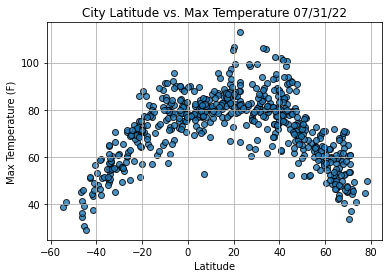

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

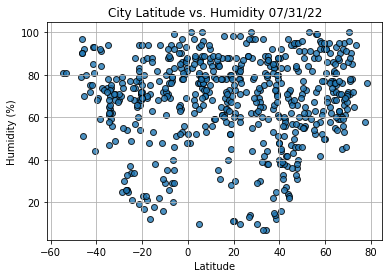

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

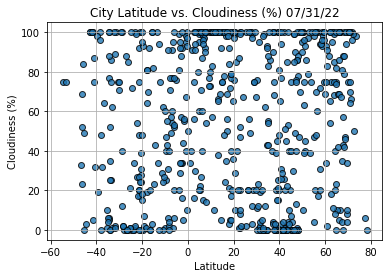

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

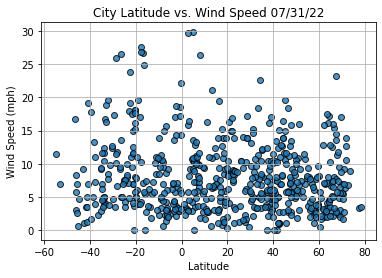

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()